# Amount of student discussion activity over the semester


In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args


sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

term_19 = args.semester_2019_Spring
start_date_19 = args.start_date_2019_Spring
cutoff_date_19 = args.cutoff_date_2019_Spring
end_date_19 = args.end_date_2019_Spring

term_18 = args.semester_2018_Spring
start_date_18 = args.start_date_2018_Spring
cutoff_date_18 = args.cutoff_date_2018_Spring
end_date_18 = args.end_date_2018_Spring

term_17 = args.semester_2017_Spring
start_date_17 = args.start_date_2017_Spring
cutoff_date_17 = args.cutoff_date_2017_Spring
end_date_17 = args.end_date_2017_Spring

In [9]:
def discussion_time(start_date, end_date):
    # load students
    f = open('../user_id_groups.pkl', 'rb')
    user = pickle.load(f)
    stu = user['student']
    
    # loading assignments
    assignments = pd.read_csv(args.assignments, sep='\t', header=0)
    assignments = assignments.loc[:, ['assignment_id', 'grading_type']].drop_duplicates()

    # loading discussions
    announce = pd.read_csv(args.discussion_topics, sep='\t', header=0)
    announce = announce.loc[(announce['workflow_state']=='active')&(announce['user_id'].isin(stu))]
    announce = announce.loc[(announce['created_at']>=start_date)&(announce['created_at']<=end_date)]
    announce = announce.merge(assignments, on='assignment_id', how='left')
    announce_time_ungraded = announce.loc[(announce['grading_type']=='not_graded')|(announce['grading_type'].isnull())] ['created_at']
    announce_time_graded = announce.loc[(announce['grading_type']!='not_graded')&(announce['grading_type'].notnull())] ['created_at']

    # loading discussion entries
    discussion = pd.read_csv(args.discussion_entry, sep='\t', header=0)
    #discussion = discussion.loc[(discussion['workflow_state']=='active')&(discussion['user_id'].isin(stu))]
    discussion = discussion.loc[discussion['user_id'].isin(stu)]
    discussion = discussion.loc[(discussion['created_at']>=start_date)&(discussion['created_at']<=end_date)]
    discussion = discussion.merge(assignments, left_on='topic_assignment_id', right_on='assignment_id', how='left')
    discussion_time_ungraded = discussion.loc[(discussion['grading_type']=='not_graded')|(discussion['grading_type'].isnull())] ['created_at']
    discussion_time_graded = discussion.loc[(discussion['grading_type']!='not_graded')&(discussion['grading_type'].notnull())]['created_at']

    time_ungraded = pd.concat((announce_time_ungraded, discussion_time_ungraded), axis=0)
    #print(time_ungraded)
    time_ungraded = pd.to_datetime(time_ungraded, format='%Y-%m-%d %H:%M:%S.%f')
    time_ungraded = time_ungraded.apply(lambda x: x.date())
    time_ungraded = time_ungraded.to_frame(name='date')
    time_ungraded = time_ungraded.groupby('date').size().reset_index()
    
    time_graded = pd.concat((announce_time_graded, discussion_time_graded), axis=0)
    time_graded = pd.to_datetime(time_graded, format='%Y-%m-%d %H:%M:%S.%f')
    time_graded = time_graded.apply(lambda x: x.date())
    time_graded = time_graded.to_frame(name='date')
    time_graded = time_graded.groupby('date').size().reset_index()
    
    return time_ungraded, time_graded

time_20_ungraded, time_20_graded = discussion_time(start_date_20, end_date_20)
time_19_ungraded, time_19_graded = discussion_time(start_date_19, end_date_19)
time_18_ungraded, time_18_graded = discussion_time(start_date_18, end_date_18)
time_17_ungraded, time_17_graded = discussion_time(start_date_17, end_date_17)

time_20_ungraded.set_index('date', inplace=True)
time_20_graded.set_index('date', inplace=True)
time_19_ungraded['date'] = time_19_ungraded['date'].apply(lambda x: x.replace(year=2020))
time_19_ungraded.set_index('date', inplace=True)
time_19_graded['date'] = time_19_graded['date'].apply(lambda x: x.replace(year=2020))
time_19_graded.set_index('date', inplace=True)
time_18_ungraded['date'] = time_18_ungraded['date'].apply(lambda x: x.replace(year=2020))
time_18_ungraded.set_index('date', inplace=True)
time_18_graded['date'] = time_18_graded['date'].apply(lambda x: x.replace(year=2020))
time_18_graded.set_index('date', inplace=True)
time_17_ungraded['date'] = time_17_ungraded['date'].apply(lambda x: x.replace(year=2020))
time_17_ungraded.set_index('date', inplace=True)
time_17_graded['date'] = time_17_graded['date'].apply(lambda x: x.replace(year=2020))
time_17_graded.set_index('date', inplace=True)

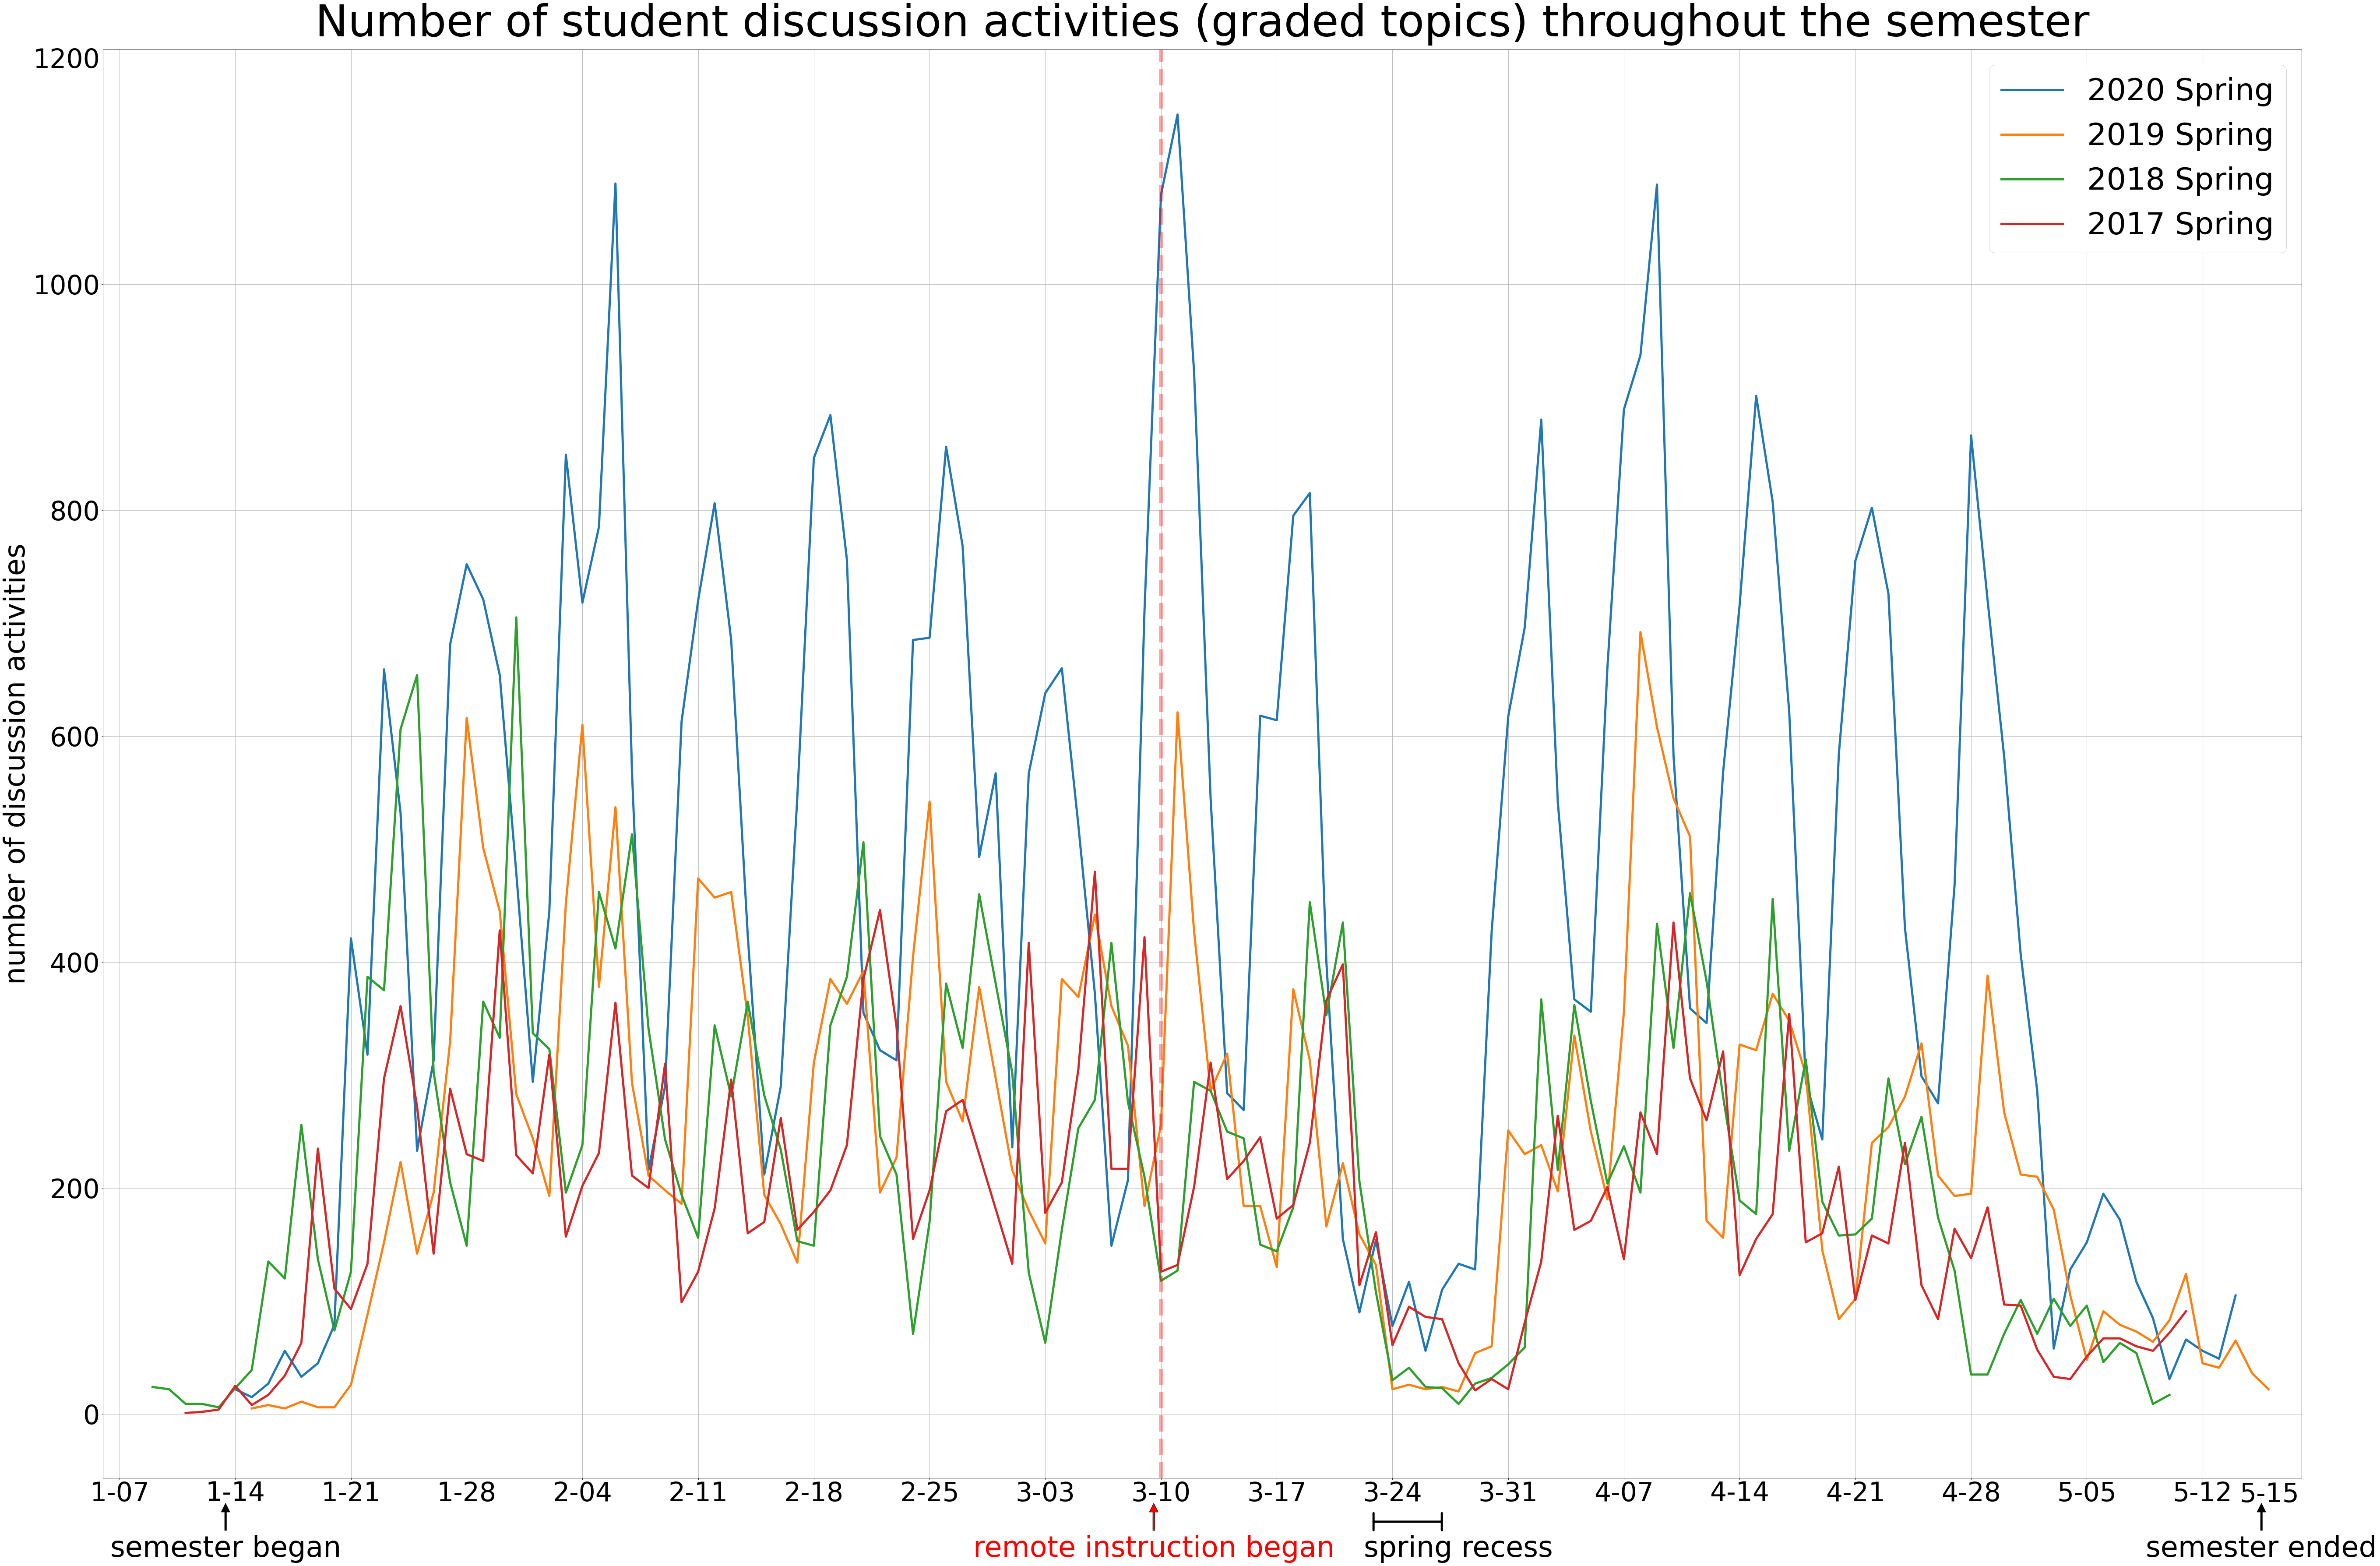

In [11]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(time_20_graded, linewidth=5.0, label='2020 Spring')
plt.plot(time_19_graded, linewidth=5.0, label='2019 Spring')
plt.plot(time_18_graded, linewidth=5.0, label='2018 Spring')
plt.plot(time_17_graded, linewidth=5.0, label='2017 Spring')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of student discussion activities (graded topics) throughout the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of discussion activities', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

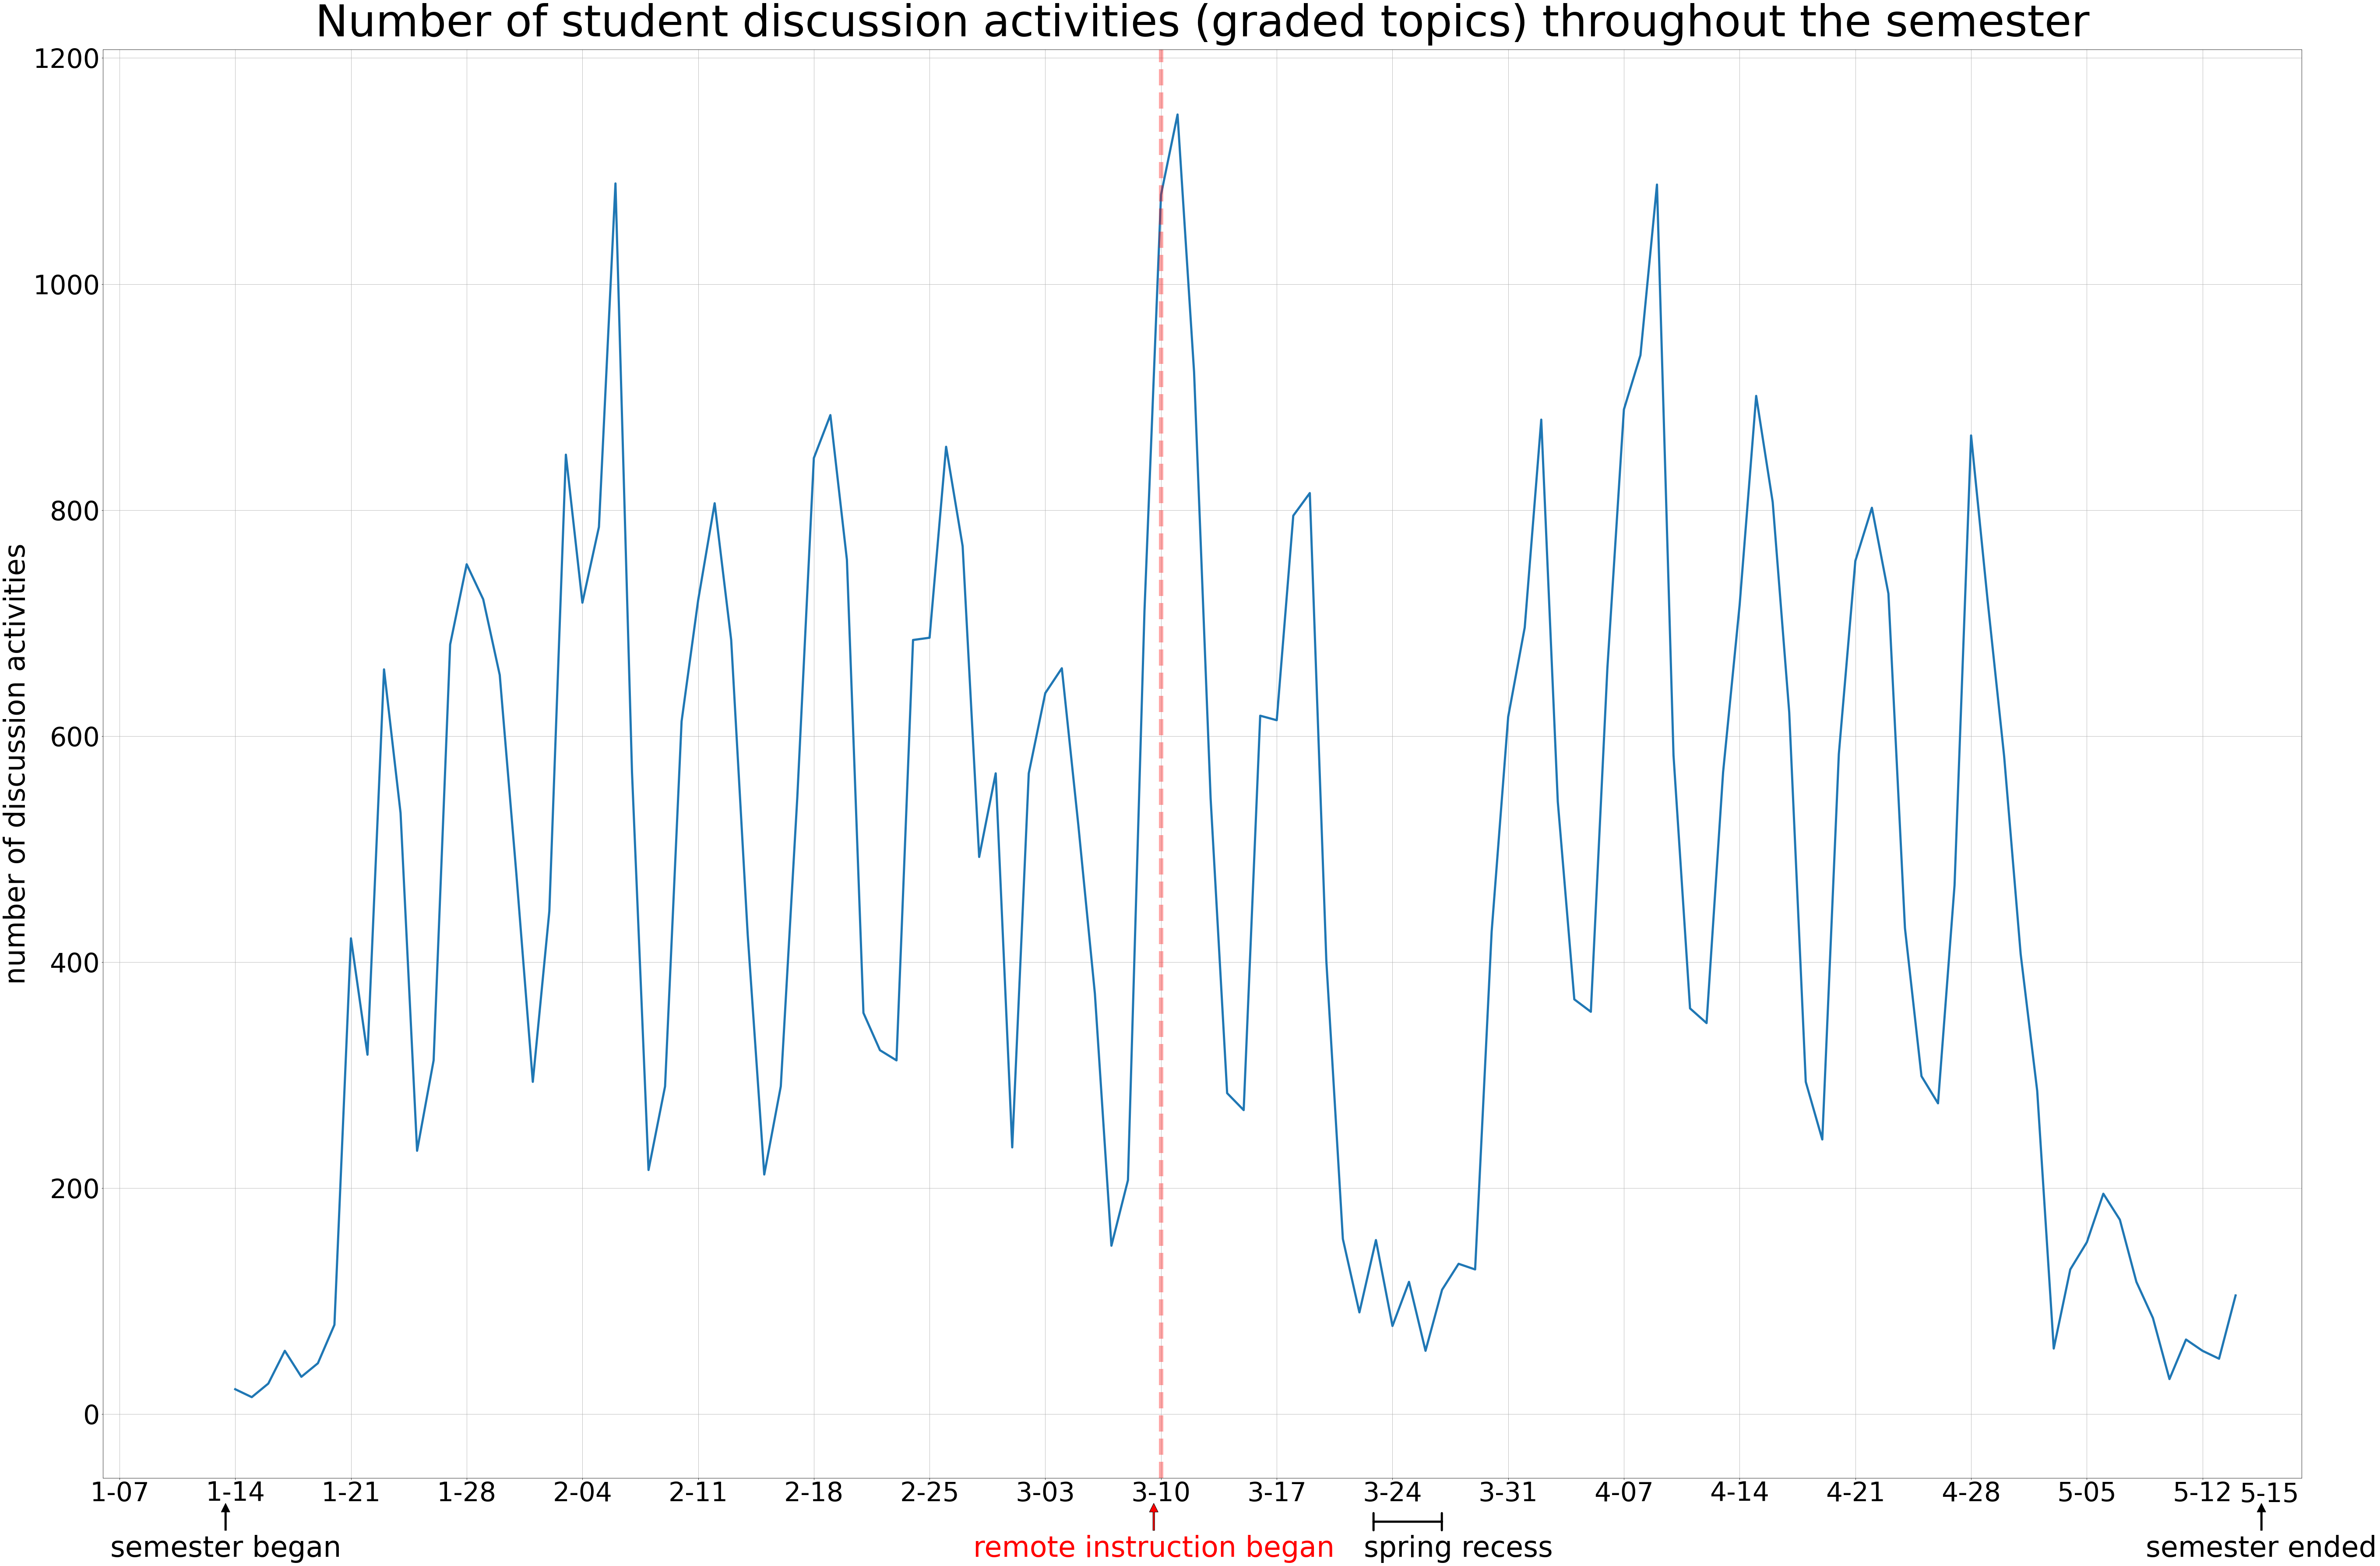

In [12]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(time_20_graded, linewidth=5.0, label='2020 Spring')
plt.plot(time_19_graded, linewidth=5.0, label='2019 Spring', alpha=0)
plt.plot(time_18_graded, linewidth=5.0, label='2018 Spring', alpha=0)
plt.plot(time_17_graded, linewidth=5.0, label='2017 Spring', alpha=0)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of student discussion activities (graded topics) throughout the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of discussion activities', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
#plt.legend(prop={'size': 70})
plt.show()

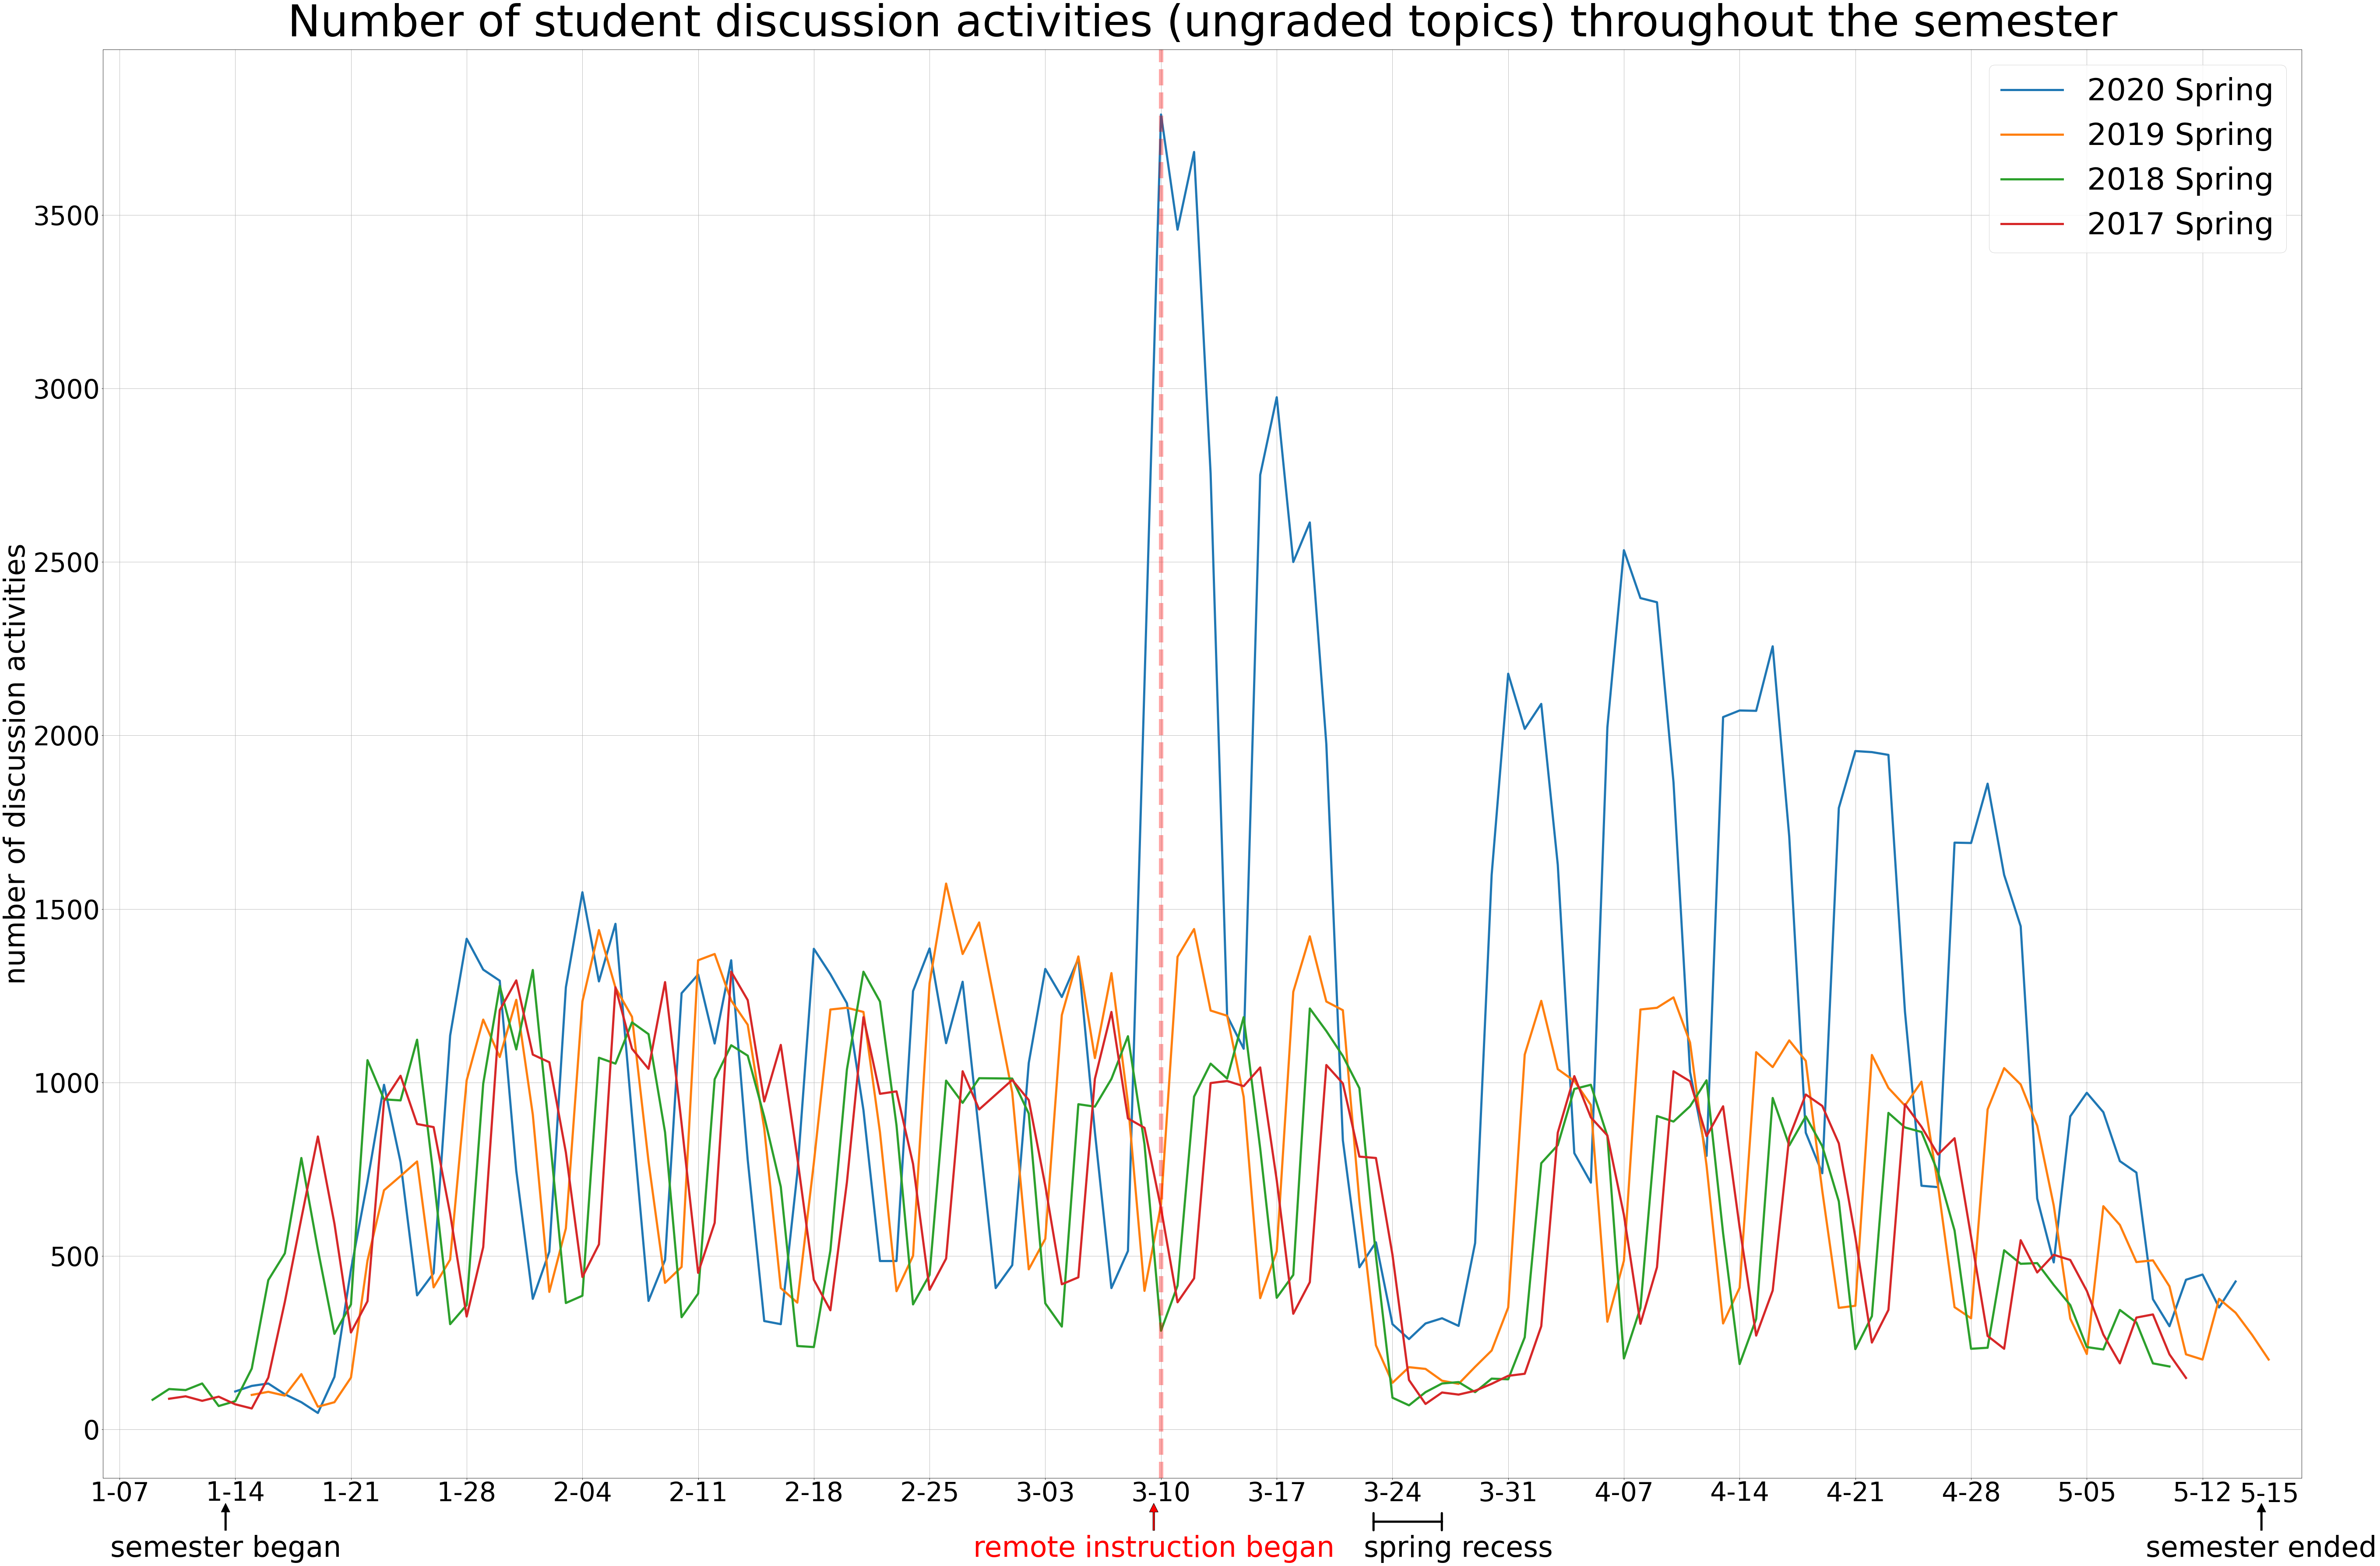

In [13]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(time_20_ungraded, linewidth=5.0, label='2020 Spring')
plt.plot(time_19_ungraded, linewidth=5.0, label='2019 Spring')
plt.plot(time_18_ungraded, linewidth=5.0, label='2018 Spring')
plt.plot(time_17_ungraded, linewidth=5.0, label='2017 Spring')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of student discussion activities (ungraded topics) throughout the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of discussion activities', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

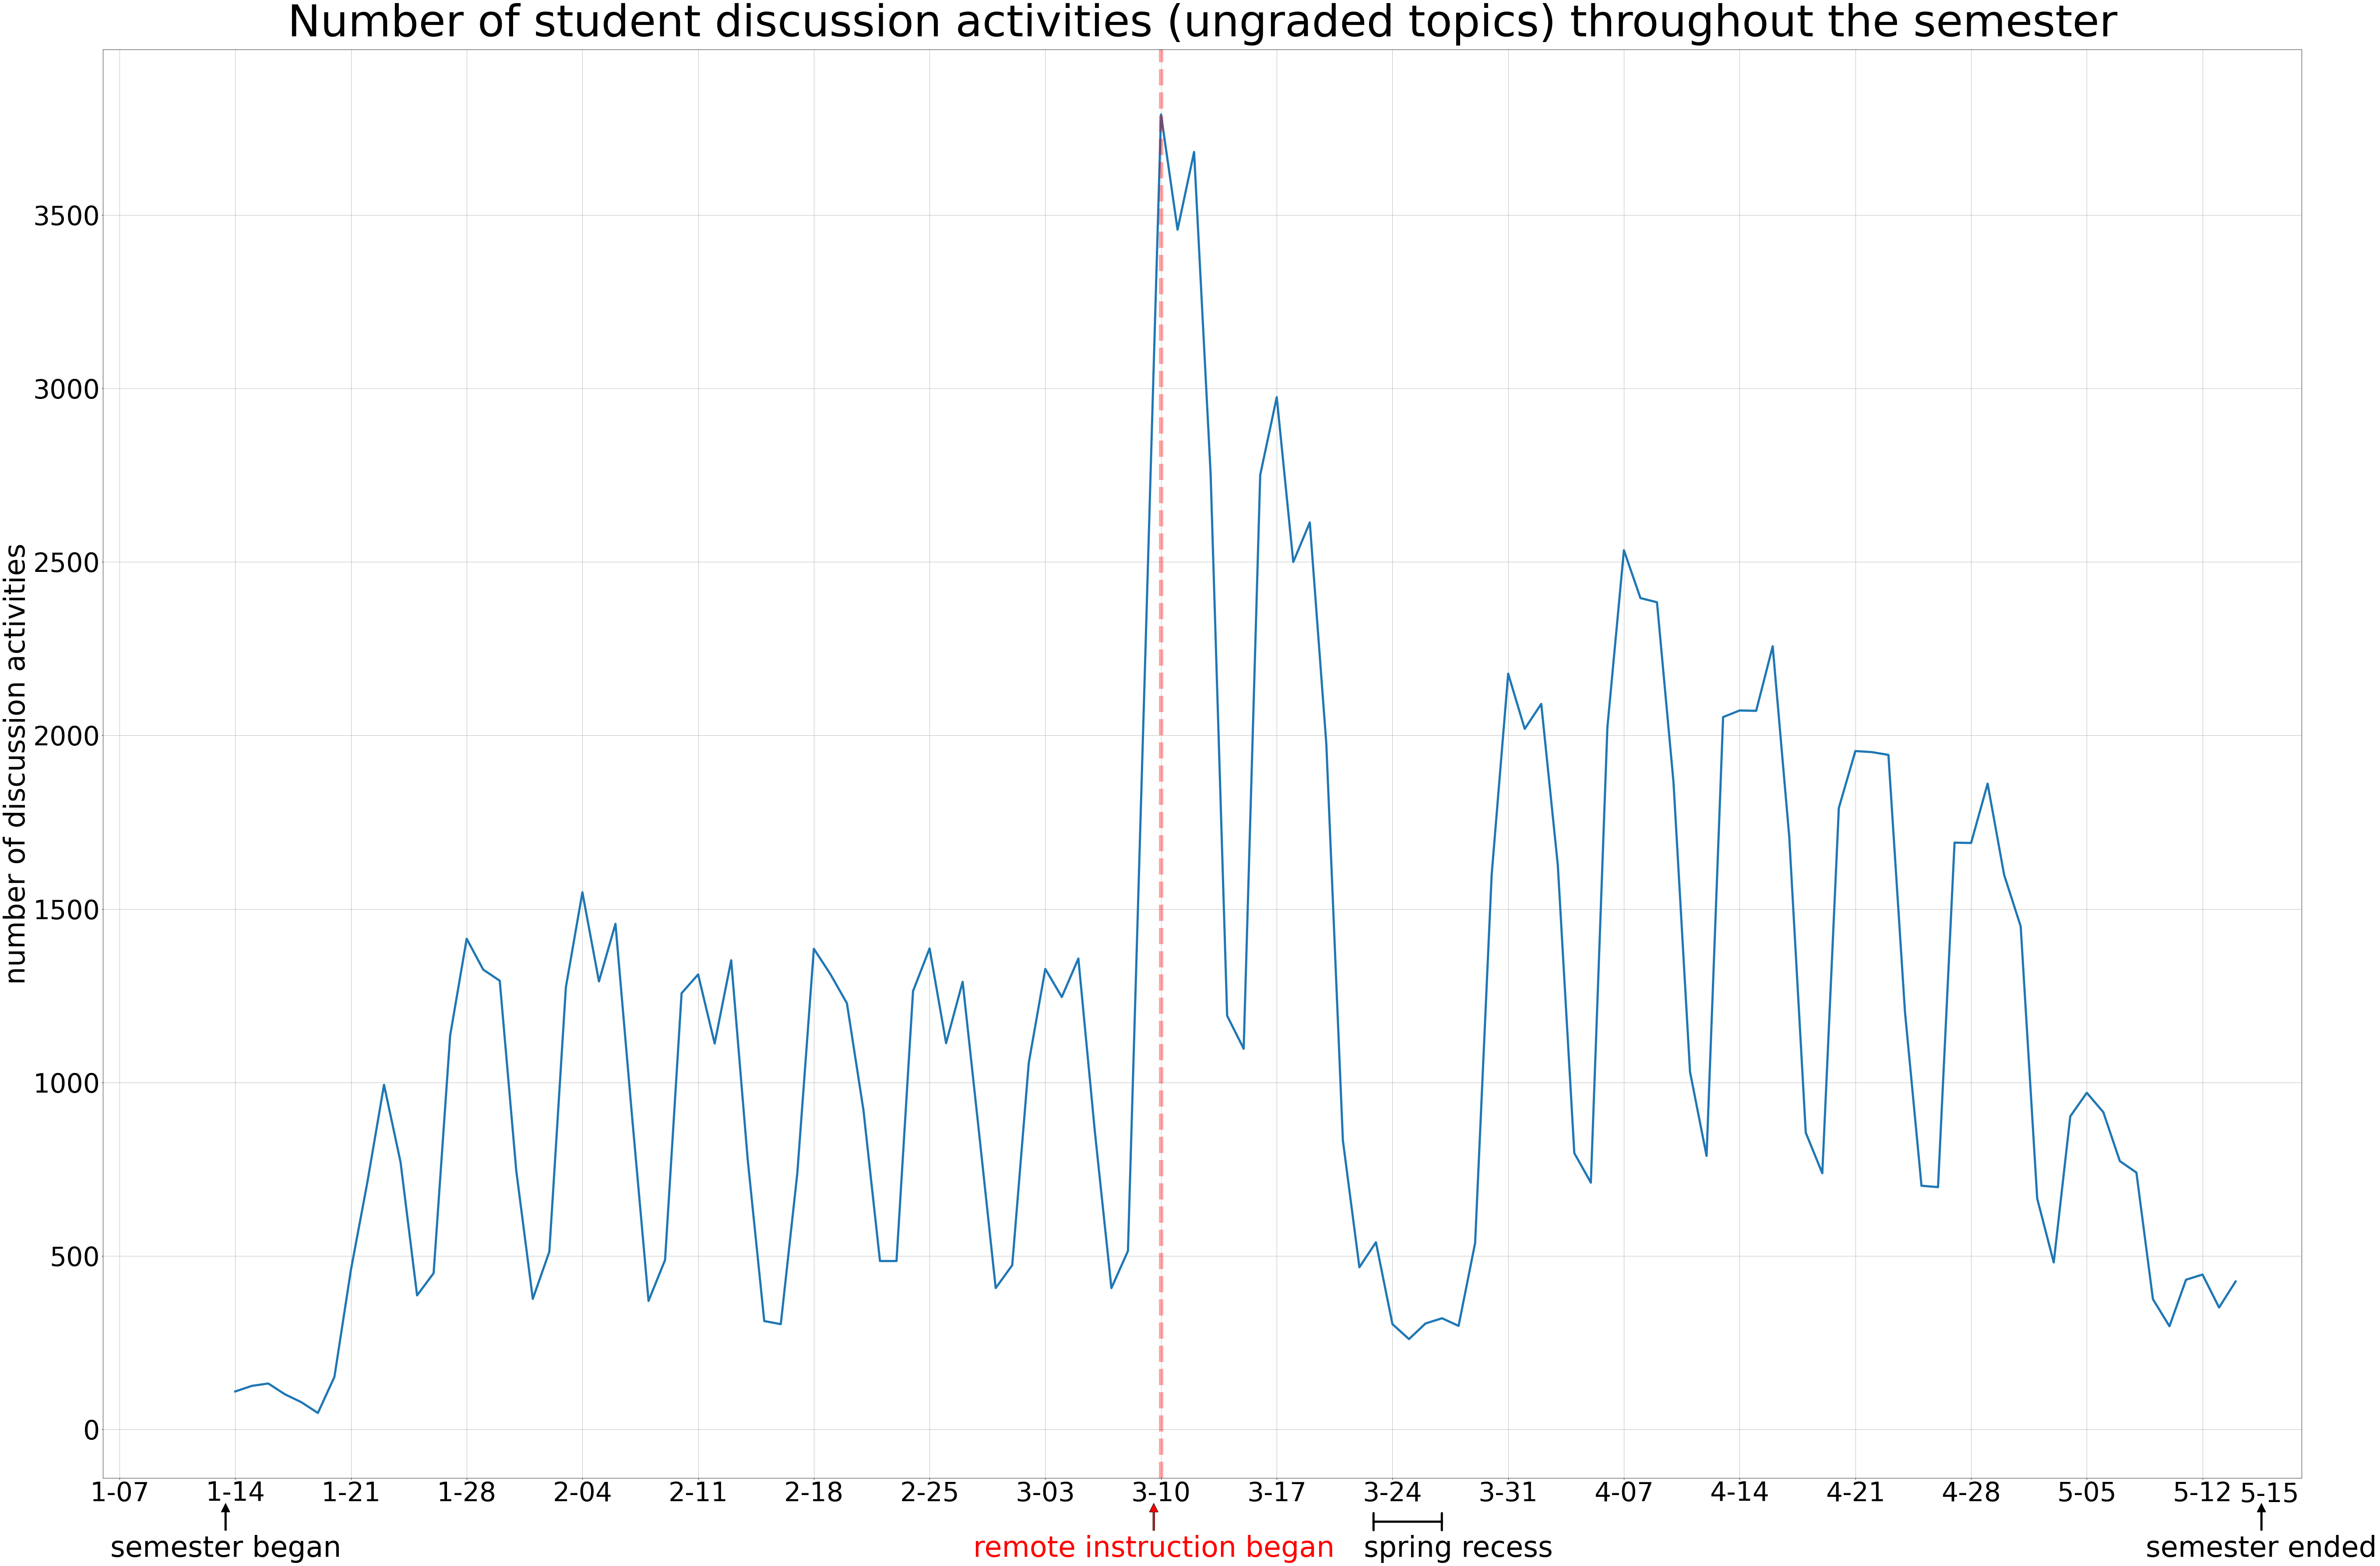

In [14]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(time_20_ungraded, linewidth=5.0, label='2020 Spring')
plt.plot(time_19_ungraded, linewidth=5.0, label='2019 Spring', alpha=0)
plt.plot(time_18_ungraded, linewidth=5.0, label='2018 Spring', alpha=0)
plt.plot(time_17_ungraded, linewidth=5.0, label='2017 Spring', alpha=0)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of student discussion activities (ungraded topics) throughout the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of discussion activities', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
#plt.legend(prop={'size': 70})
plt.show()